In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/bolade/My_GH_Projects/gender_detection/gender_detection.csv')

In [3]:
df.head()

,file,gender,split
0,train/women/0.jpg,woman,train
1,train/women/1.jpg,woman,train
2,train/women/2.jpg,woman,train
3,train/women/3.jpg,woman,train
4,train/women/4.jpg,woman,train


In [4]:
df.sum()

file      train/women/0.jpgtrain/women/1.jpgtrain/women/...
gender    womanwomanwomanwomanwomanwomanwomanwomanwomanw...
split     traintraintraintraintraintraintraintraintraint...
dtype: object

In [5]:
df.describe()

,file,gender,split
count,300,300,300
unique,300,2,2
top,train/women/0.jpg,woman,train
freq,1,150,220


In [6]:
df.shape

(300, 3)

In [7]:
df.columns.tolist()

['file', 'gender', 'split']

In [8]:
import matplotlib.pyplot as plt

In [9]:
!pip install seaborn --upgrade

In [10]:
import seaborn as sns
sns.set(style="whitegrid")

/var/folders/6d/_l83qt1s3kx4w_71xcqtm7n80000gn/T/ipykernel_43181/2887970500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='Set2')


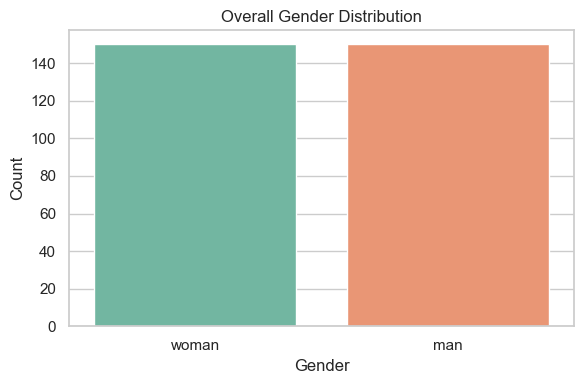

In [11]:
# Plot 1: Gender Distribution Overall
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Overall Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

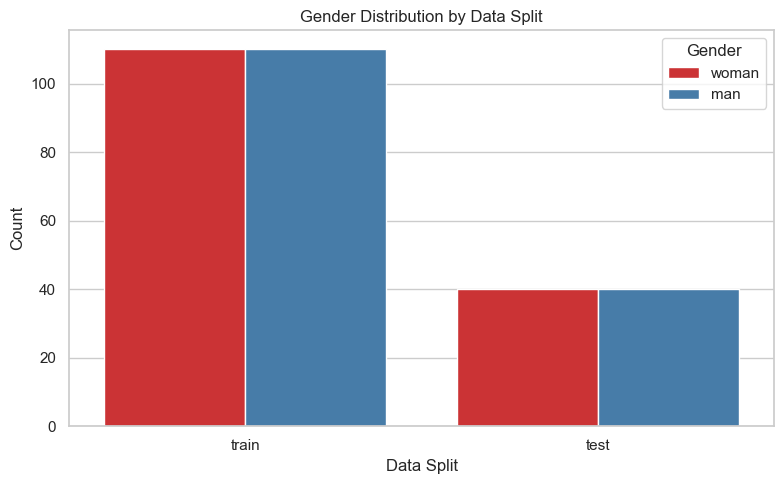

In [12]:
# Plot 2: Gender Distribution by Split
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='split', hue='gender', palette='Set1')
plt.title("Gender Distribution by Data Split")
plt.xlabel("Data Split")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [13]:
# Deeper EDA: Group by Split and Gender
gender_split_counts = df.groupby(['split', 'gender']).size().unstack()

In [14]:
# Gender Proportion per Split
gender_proportions = gender_split_counts.div(gender_split_counts.sum(axis=1), axis=0)

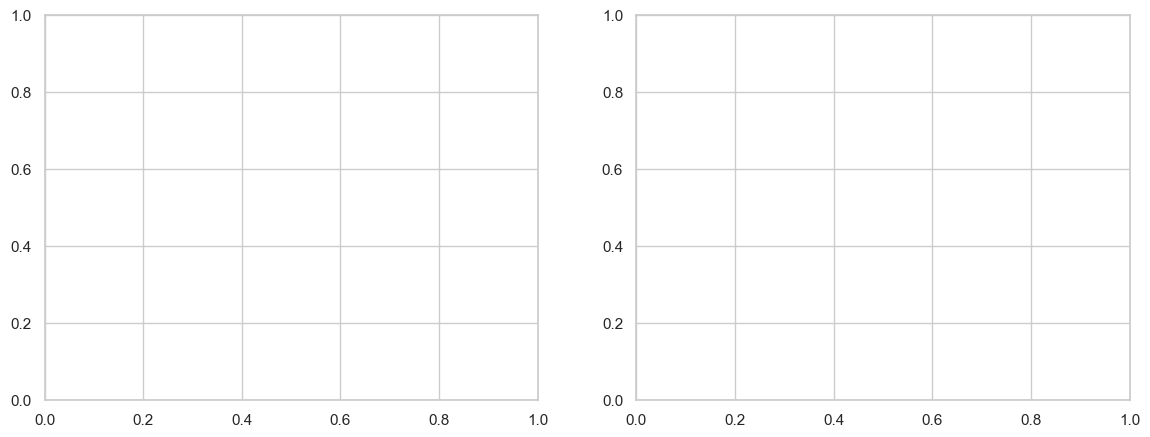

In [15]:
# Visualize group counts
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

In [16]:
# Count heatmap
sns.heatmap(gender_split_counts, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title('Gender Count by Split')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Split')

Text(142.25, 0.5, 'Split')

In [17]:
# Proportion heatmap
sns.heatmap(gender_proportions, annot=True, fmt='.2f', cmap='YlOrBr', ax=axes[1])
axes[1].set_title('Gender Proportion by Split')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Split')

Text(734.0681818181816, 0.5, 'Split')

In [18]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

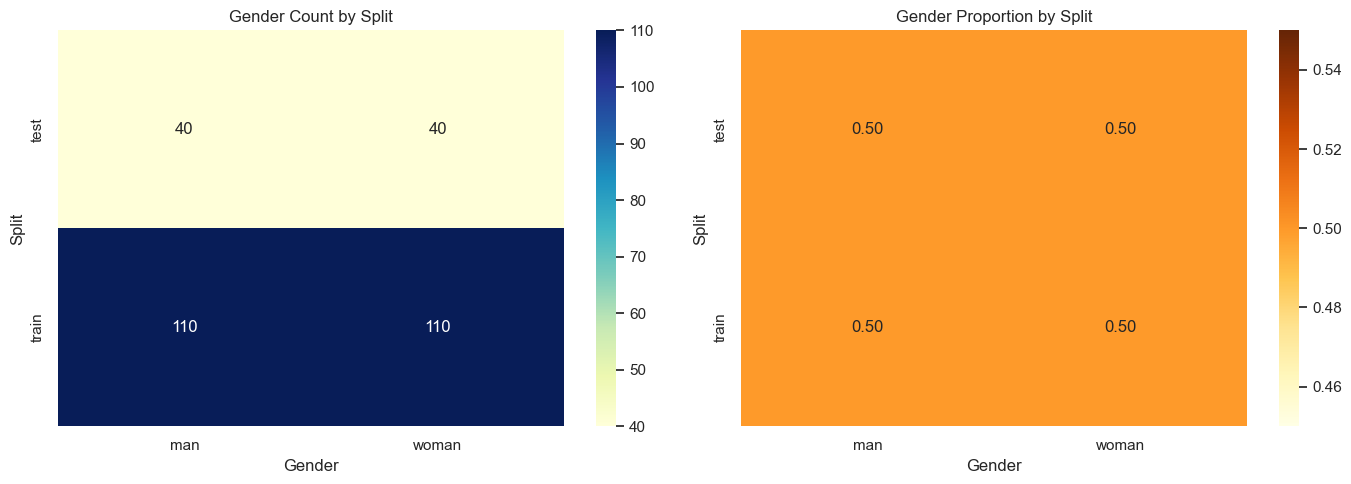

In [19]:
sns.set(style="whitegrid")

# Group by Split and Gender
gender_split_counts = df.groupby(['split', 'gender']).size().unstack()

# Gender Proportion per Split
gender_proportions = gender_split_counts.div(gender_split_counts.sum(axis=1), axis=0)

# Plot counts and proportions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count heatmap
sns.heatmap(gender_split_counts, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title('Gender Count by Split')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Split')

# Proportion heatmap
sns.heatmap(gender_proportions, annot=True, fmt='.2f', cmap='YlOrBr', ax=axes[1])
axes[1].set_title('Gender Proportion by Split')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Split')

plt.tight_layout()
plt.show()

## Phase 2.1: Data Understanding 

In [21]:
import os
import pandas as pd
from PIL import Image, ImageStat

In [22]:
# Setting Local Paths
train_dir = "/Users/bolade/My_GH_Projects/gender_detection/data/train"
test_dir = "/Users/bolade/My_GH_Projects/gender_detection/data/test"

In [23]:
# Define function to collect image stats
def collect_image_statistics(data_dir):
    stats = []
    for gender_folder in os.listdir(data_dir):
        gender_path = os.path.join(data_dir, gender_folder)
        if os.path.isdir(gender_path):
            for filename in os.listdir(gender_path):
                file_path = os.path.join(gender_path, filename)
                try:
                    with Image.open(file_path) as img:
                        stat = ImageStat.Stat(img.convert('L'))  # grayscale
                        brightness = stat.mean[0]
                        contrast = stat.stddev[0]
                        stats.append({
                            "gender": gender_folder,
                            "file": file_path,
                            "format": img.format,
                            "size": img.size,
                            "mode": img.mode,
                            "brightness": brightness,
                            "contrast": contrast
                        })
                except Exception as e:
                    stats.append({
                        "gender": gender_folder,
                        "file": file_path,
                        "format": None,
                        "size": None,
                        "mode": None,
                        "brightness": None,
                        "contrast": None,
                        "error": str(e)
                    })
    return pd.DataFrame(stats)

In [24]:
# Run for both sets
train_df = collect_image_statistics(train_dir)
test_df = collect_image_statistics(test_dir)

In [25]:
# Combine into one DataFrame
image_stats_df = pd.concat([train_df, test_df], ignore_index=True)

### Extract Width & Height

In [27]:
# Image size distribution
image_stats_df['width'] = image_stats_df['size'].apply(lambda x: x[0] if x else None)
image_stats_df['height'] = image_stats_df['size'].apply(lambda x: x[1] if x else None)

### Quick Summary Checks

In [29]:
# Number of images by gender
print(image_stats_df['gender'].value_counts())

# Format breakdown
print(image_stats_df['format'].value_counts())

# Class balance check
print("Gender Class Proportions (%):")
print(image_stats_df['gender'].value_counts(normalize=True) * 100)

# Corrupted or unreadable files
corrupted = image_stats_df[image_stats_df['format'].isnull()]
print(f"Corrupted images found: {len(corrupted)}")

gender
men      150
women    150
Name: count, dtype: int64
format
JPEG    300
Name: count, dtype: int64
Gender Class Proportions (%):
gender
men      50.0
women    50.0
Name: proportion, dtype: float64
Corrupted images found: 0


## Phase 2.2: Data Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

#### Gender Class Distribution

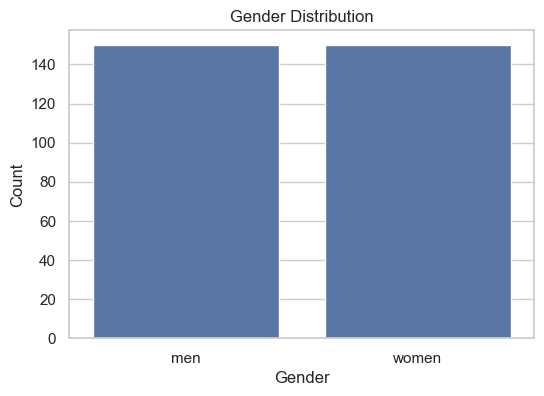

In [33]:
# Plotting Gender Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=image_stats_df, x="gender", order=image_stats_df['gender'].value_counts().index)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### Image Dimension Distribution

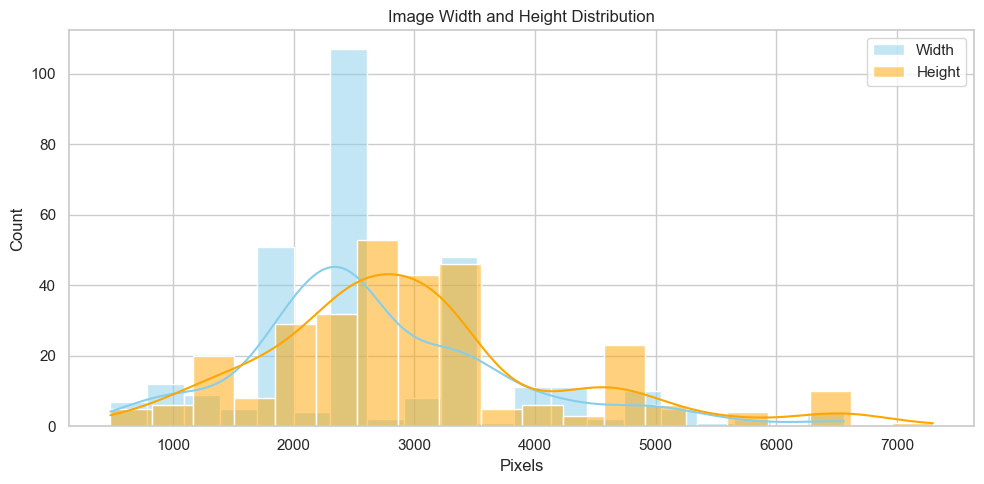

In [35]:
# Plotting Image Dimension Distribution
plt.figure(figsize=(10, 5))
sns.histplot(image_stats_df['width'], bins=20, kde=True, color='skyblue', label='Width')
sns.histplot(image_stats_df['height'], bins=20, kde=True, color='orange', label='Height')
plt.title("Image Width and Height Distribution")
plt.xlabel("Pixels")
plt.legend()
plt.tight_layout()
plt.show()

#### Improving Chart colors

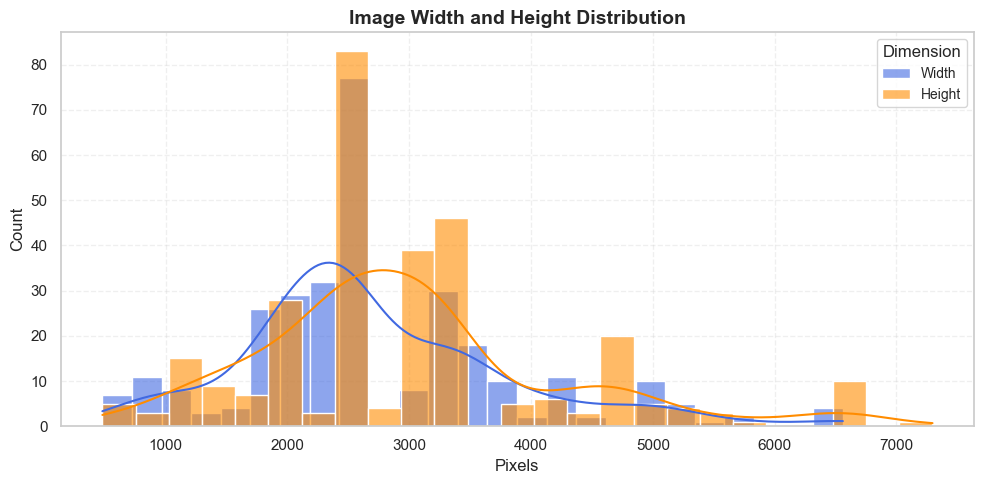

In [37]:
plt.figure(figsize=(10, 5))

# Width: royal blue with transparency
sns.histplot(
    image_stats_df['width'],
    bins=25,
    kde=True,
    color='#4169E1',  # RoyalBlue
    label='Width',
    alpha=0.6
)

# Height: dark orange with transparency
sns.histplot(
    image_stats_df['height'],
    bins=25,
    kde=True,
    color='#FF8C00',  # DarkOrange
    label='Height',
    alpha=0.6
)

plt.title("Image Width and Height Distribution", fontsize=14, weight='bold')
plt.xlabel("Pixels", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Dimension", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

### Brightness and Contrast Distribution

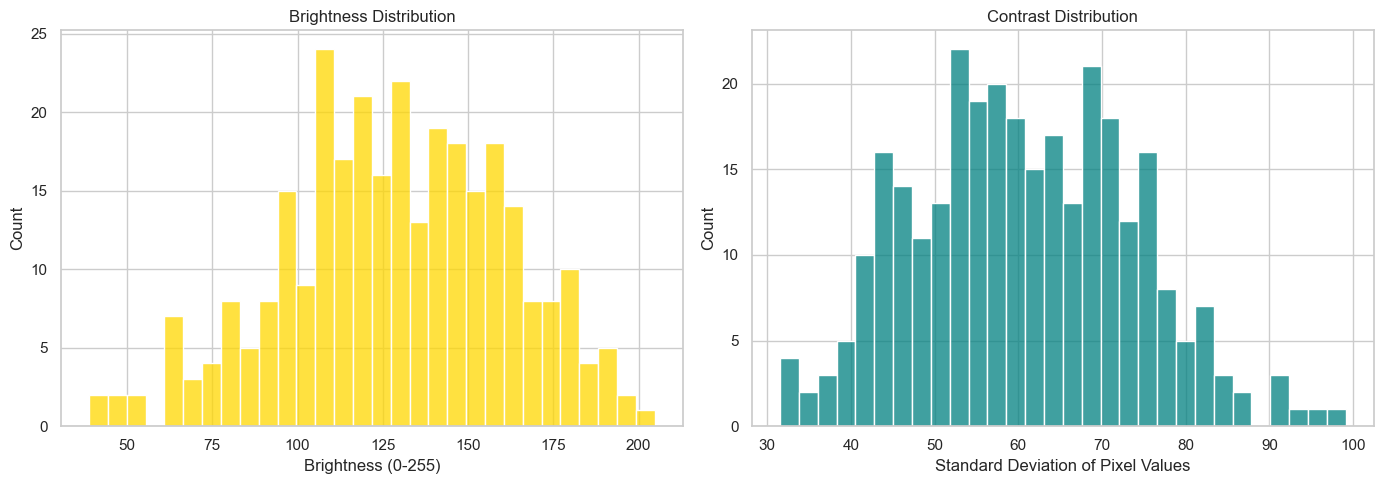

In [39]:
# Plotting Brightness & Contrast Disctibution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Brightness
sns.histplot(image_stats_df['brightness'].dropna(), bins=30, ax=axes[0], color='gold')
axes[0].set_title("Brightness Distribution")
axes[0].set_xlabel("Brightness (0-255)")

# Contrast
sns.histplot(image_stats_df['contrast'].dropna(), bins=30, ax=axes[1], color='teal')
axes[1].set_title("Contrast Distribution")
axes[1].set_xlabel("Standard Deviation of Pixel Values")

plt.tight_layout()
plt.show()


### Sample Image Grid
##### Visualizing random samples from each class

In [41]:
import random
from PIL import Image

def plot_sample_images(df, label, n=5):
    samples = df[df['gender'] == label].sample(n)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i, (_, row) in enumerate(samples.iterrows()):
        img = Image.open(row['file'])
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(label)
    plt.tight_layout()
    plt.show()

#plot_sample_images(image_stats_df, 'men', n=5)
#plot_sample_images(image_stats_df, 'women', n=5)

In [42]:
#### The code above ran successfully. Deleted image grid for repo push

### Phase 2.3: Data Quality Assessment
- Identify missing or corrupted images
- Detect outliers or mislabeled data
- Assess lighting conditions and image clarity
- Evaluate face detection accuracy on the dataset
- Document data quality findings

#### Identify missing or currupted images
##### This has been partly done in 2.1

In [45]:
# Corrupted or unreadable files
corrupted = image_stats_df[image_stats_df['format'].isnull()]
print(f"Corrupted images found: {len(corrupted)}")

# Only show columns that exist
columns_to_show = [col for col in ['file', 'gender', 'error'] if col in corrupted.columns]
display(corrupted[columns_to_show])

Corrupted images found: 0


,file,gender


#### Detect Outliers or Mislabeled data
##### Brightness, Contrast, Size

In [47]:
# Check brightness and contrast extremes
outlier_brightness = image_stats_df[
    (image_stats_df['brightness'] < 20) | 
    (image_stats_df['brightness'] > 240)
]

outlier_contrast = image_stats_df[
    (image_stats_df['contrast'] < 5) | 
    (image_stats_df['contrast'] > 80)
]

# Unusual sizes
unusual_size = image_stats_df[
    (image_stats_df['width'] > 5000) | 
    (image_stats_df['height'] > 5000) |
    (image_stats_df['width'] < 200) |
    (image_stats_df['height'] < 200)
]

print(f"Outliers by brightness: {len(outlier_brightness)}")
print(f"Outliers by contrast: {len(outlier_contrast)}")
print(f"Unusual sizes: {len(unusual_size)}")

Outliers by brightness: 0
Outliers by contrast: 21
Unusual sizes: 30


#### Assess Lighting and Clarity (via Brightness/Contrast)

In [49]:
print("Average Brightness:", image_stats_df['brightness'].mean())
print("Average Contrast:", image_stats_df['contrast'].mean())

# Very dark or overexposed
dark_images = image_stats_df[image_stats_df['brightness'] < 30]
bright_images = image_stats_df[image_stats_df['brightness'] > 230]

print(f"Very dark images: {len(dark_images)}")
print(f"Overexposed images: {len(bright_images)}")

Average Brightness: 128.6990635153211
Average Contrast: 60.552654571417385
Very dark images: 0
Overexposed images: 0


#### Evaluate Face Detection Accuracy 

In [51]:
!pip install opencv-python

In [52]:
import cv2

In [53]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [54]:
import urllib.request
import cv2

# Download the Haar cascade XML file for face detection
cascade_url = "https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml"
cascade_path = "haarcascade_frontalface_default.xml"

# Download only if not already present
if not os.path.exists(cascade_path):
    urllib.request.urlretrieve(cascade_url, cascade_path)
    print("Cascade file downloaded.")
else:
    print("Cascade file already exists.")

# Load into OpenCV
face_cascade = cv2.CascadeClassifier(cascade_path)

Cascade file already exists.


In [55]:
def detect_faces_opencv(image_path):
    img = cv2.imread('/Users/bolade/My_GH_Projects/gender_detection/data/test/women/128.jpg')
    if img is None:
        return -1  # Unreadable image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    return len(faces)

In [56]:
sample_df = image_stats_df.sample(5, random_state=42)  # adjust as needed

sample_df['faces_detected'] = sample_df['file'].apply(lambda x: detect_faces_opencv(x) if os.path.exists(x) else -1)

print(f"No faces detected in: {(sample_df['faces_detected'] == 0).sum()} out of {len(sample_df)}")

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


No faces detected in: 0 out of 5


In [105]:
sample_df = image_stats_df.sample(10, random_state=42)
sample_df['faces_detected'] = sample_df['file'].apply(lambda x: detect_faces_opencv(x) if os.path.exists(x) else -1)
print(f"No faces detected in: {(sample_df['faces_detected'] == 0).sum()} out of {len(sample_df)}")

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG


No faces detected in: 0 out of 10


Invalid SOS parameters for sequential JPEG


#### Visualize Images with No Face Detected

In [59]:
from PIL import Image
import matplotlib.pyplot as plt

# Filter DataFrame for failed face detections
no_face_df = sample_df[sample_df['faces_detected'] == 0]

# Display first 5
for i, row in no_face_df.head(5).iterrows():
    try:
        img = Image.open(row['file'])
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"No face detected\n({row['gender']})")
        plt.show()
    except Exception as e:
        print(f"Failed to open image: {row['file']} - {e}")
